<a href="https://colab.research.google.com/github/sanket-ghodake/encryption-decryption-simple/blob/main/pdf_encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TO DO 
1. https://drive.google.com/file/d/1sKL22iwKdFFPf3h9yj3Qdha7Gkgfiffo/view?usp=sharing size of each folder 

2. public private key encryption

3. 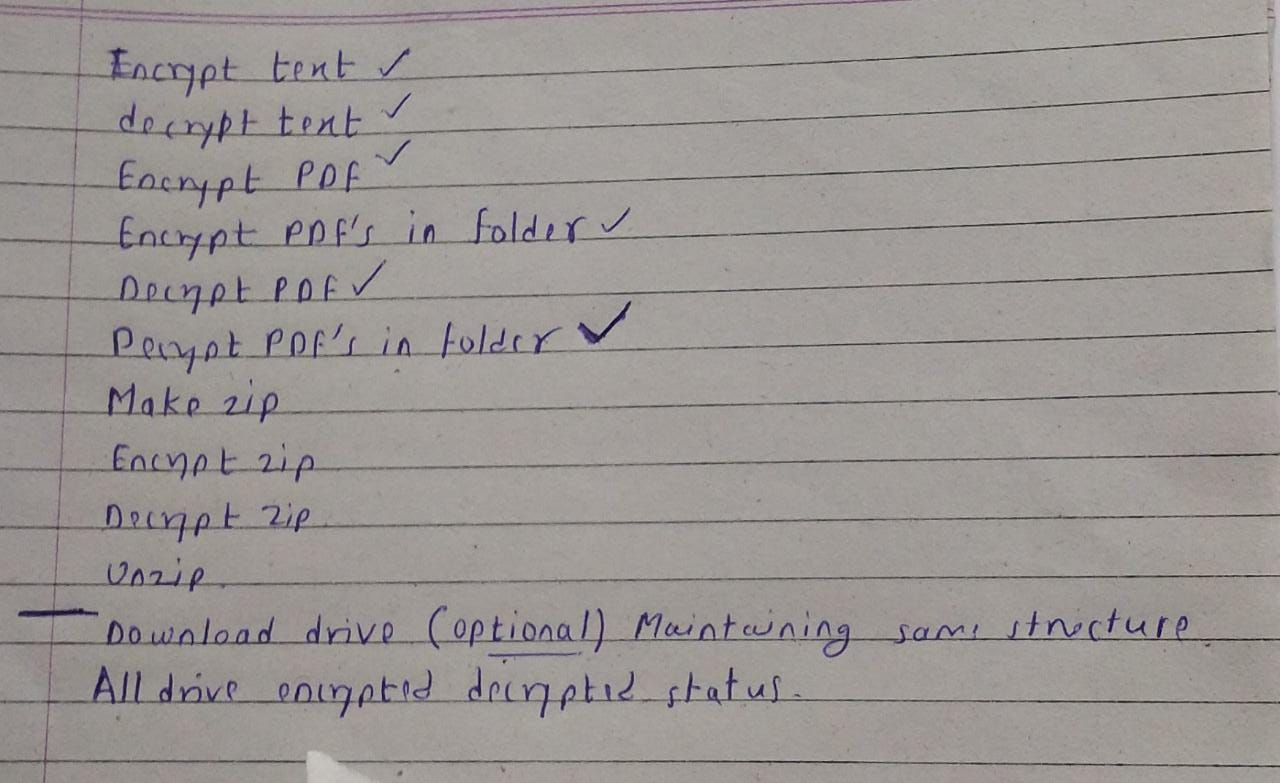

## accessing drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Encrypt decrypt PDF 

https://pikepdf.readthedocs.io/en/latest/api/models.html#pikepdf.models.Encryption   

https://pikepdf.readthedocs.io/en/latest/api/models.html#pikepdf.Permissions 

https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python 

https://stackoverflow.com/questions/43475295/encrypt-pdfs-in-python#:~:text=from%20pikepdf%20import%20Pdf%0Apdf%20%3D%20Pdf.open(path/to/file)%20%20%20%20%0Apdf.save(%27output_filename.pdf%27%2C%20encryption%3Dpikepdf.Encryption(owner%3Dpassword%2C%20user%3Dpassword%2C%20R%3D4))%20%0A%23%20you%20can%20change%20the%20R%20from%204%20to%206%20for%20256%20aes%20encryption%0Apdf.close() 

https://pikepdf.readthedocs.io/en/latest/topics/security.html

https://stackoverflow.com/questions/42130504/unable-to-use-pypdf-module 

https://stackoverflow.com/questions/4226479/scan-for-secured-pdf-documents 

https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python#:~:text=Similar%20to%20answers%20above%2C%20but%20for%20python3%2C%20arguably%20readable%20and%20arguably%20extensible%3A 



In [ ]:
!pip install pikepdf
!pip install PyPDF2

In [ ]:
import os
import datetime
from pikepdf.models.encryption import Permissions
from pikepdf import Pdf
import pikepdf
import PyPDF2

def write_text_file(file_name,text):
  file1 = open(file_name,"a")
  file1.write(text)
  file1.write("\n")
  file1.close() 

def encrypt_drive_directory_single_file(directory = None,single_file = None , owner_password = '',user_password = ''):
  record_details =[]
  if directory is None or directory =='':
    print('Error')
    return 0

  time =str(datetime.datetime.now())
  
  if not(single_file is None or single_file==''):
    if single_file.endswith('.pdf'):
          time =str(datetime.datetime.now())
          # print(os.path.join(path, name))
          file_name = single_file
           
          if not PyPDF2.PdfFileReader(open(file_name, 'rb')).isEncrypted:
            pdf = Pdf.open(file_name,allow_overwriting_input=True)  #TO COMMENT
            pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
            record_details.append(str(file_name+" encrypted at "+time))
          else:
            pdf = Pdf.open(file_name,password=owner_password,allow_overwriting_input=True)  #TO COMMENT
            pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
            record_details.append(str(file_name+" encrypted again "+time))
          pdf.close()
          write_text_file('text.txt',str("SINGLE FILE - "+file_name+" encrypted at "+time))
          return record_details
    else:
      print("Not a PDF")
      return 0

  count =0
  for path, subdirs, files in os.walk(directory):
    for name in files:
        if name.endswith('.pdf'):
          count+=1
          time =str(datetime.datetime.now())
          # print(os.path.join(path, name))
          file_name = os.path.join(path, name)
          try:
            if not PyPDF2.PdfFileReader(open(file_name, 'rb')).isEncrypted:
              pdf = Pdf.open(file_name,allow_overwriting_input=True)  
              pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
              record_details.append(str(file_name+" encrypted at "+time))
            else:
              pdf = Pdf.open(file_name,password=owner_password,allow_overwriting_input=True)  #TO COMMENT
              pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
              record_details.append(str(file_name+" encrypted again "+time))
            pdf.close()
            write_text_file('text.txt',str(file_name+" encrypted at "+time))
          except:
            write_text_file('text.txt',str(file_name+" can't encrypt"))
    
  write_text_file('text.txt',str("DIRECTORY - ("+directory+")Encrypted at "+time+":)"))
  write_text_file('text.txt',str("Total PDF in directory :"+str(count)))
  return record_details

def decrypt_file(file_name = None , owner_password = '',user_password = '',decrypt_type='user'):
  if file_name.endswith('.pdf'):
    if decrypt_type=='owner':
      password = owner_password
      owner_password=''
    else:
      password = user_password
    user_password=''
    time =str(datetime.datetime.now())
    # print(os.path.join(path, name))
    try:
      if not PyPDF2.PdfFileReader(open(file_name, 'rb')).isEncrypted:
        pdf = Pdf.open(file_name,allow_overwriting_input=True)  #TO COMMENT
        pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
        
      else:
        pdf = Pdf.open(file_name,password=password,allow_overwriting_input=True)  #TO COMMENT
        pdf.save(file_name, encryption=pikepdf.Encryption(owner=owner_password,user=user_password ,R=6,allow=Permissions(accessibility=False, extract=False, modify_annotation=False, modify_assembly=False, modify_form=False, modify_other=False, print_lowres=True, print_highres=False),metadata=False))
        
      pdf.close()
      write_text_file('text.txt',str("SINGLE FILE - "+file_name+" decrypted at "+time))
      return 1
    except:
      write_text_file('text.txt',str("SINGLE FILE - "+file_name+" can't decrypt"))
      print("Can't decrypt file")
  else:
    print("Not a PDF")
    return 0

def decrypt_directory(directory =None, owner_password = '',user_password = '',decrypt_type="user"):
  count =0
  for path, subdirs, files in os.walk(directory):
    for name in files:
      if name.endswith('.pdf'):
        count+=1    
        file_name = os.path.join(path, name)
        decrypt_file(file_name = file_name , owner_password = owner_password,user_password = user_password ,decrypt_type=decrypt_type)
  

In [ ]:
print("Enter owner password:")
owner_password = input()
print("Enter user password:")
user_password = input()

In [ ]:
# Encrypt
directory='/content/drive/MyDrive/temp/chats'

record = encrypt_drive_directory_single_file(directory=directory,owner_password= owner_password,user_password= user_password)

for i in record:
  print(i)

In [ ]:
# Decrypt
file_name ="/content/drive/MyDrive/temp/AADHAR.pdf"
directory_name = "/content/drive/MyDrive/Sanket /Enginnering /PVG BE/Sem VII/BE Project 2021-22 Pranav Mahesh Sanket"
decrypt_directory(directory_name,owner_password=owner_password,user_password=user_password,decrypt_type='owner')

## Clear text file

In [ ]:
open('text.txt', 'w').close()

## Print file structure tree

In [ ]:
from pathlib import Path
from datetime import date

class DisplayablePath(object):
    display_filename_prefix_middle = '├──'
    display_filename_prefix_last = '└──'
    display_parent_prefix_middle = '    '
    display_parent_prefix_last = '│   '

    def __init__(self, path, parent_path, is_last):
        self.path = Path(str(path))
        self.parent = parent_path
        self.is_last = is_last
        if self.parent:
            self.depth = self.parent.depth + 1
        else:
            self.depth = 0

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    @classmethod
    def make_tree(cls, root, parent=None, is_last=False, criteria=None):
        root = Path(str(root))
        criteria = criteria or cls._default_criteria

        displayable_root = cls(root, parent, is_last)
        yield displayable_root

        children = sorted(list(path
                               for path in root.iterdir()
                               if criteria(path)),
                          key=lambda s: str(s).lower())
        count = 1
        for path in children:
            is_last = count == len(children)
            if path.is_dir():
                yield from cls.make_tree(path,
                                         parent=displayable_root,
                                         is_last=is_last,
                                         criteria=criteria)
            else:
                yield cls(path, displayable_root, is_last)
            count += 1

    @classmethod
    def _default_criteria(cls, path):
        return True

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    def displayable(self):
        if self.parent is None:
            return self.displayname

        _filename_prefix = (self.display_filename_prefix_last
                            if self.is_last
                            else self.display_filename_prefix_middle)

        parts = ['{!s} {!s}'.format(_filename_prefix,
                                    self.displayname)]

        parent = self.parent
        while parent and parent.parent is not None:
            parts.append(self.display_parent_prefix_middle
                         if parent.is_last
                         else self.display_parent_prefix_last)
            parent = parent.parent

        return ''.join(reversed(parts))

def file_structure_tree(directory=None,show_encrpytion_status=False):
  if directory is None or directory=="":
    return 0
  open('file_structure.txt', 'w').close()
  write_text_file('file_sturcture.txt',str(str(date.today())+"->"))
  write_text_file('file_sturcture.txt',str("\n"))
  paths = DisplayablePath.make_tree(Path(directory))
  for path in paths:
    display = str(path.displayable())
    print(display)
    write_text_file('file_sturcture.txt',str(display))

file_structure_tree(directory="/content/drive/MyDrive")


## Encrypt decrypt text file

https://www.pythontutorial.net/python-basics/python-write-text-file/ 

https://stackoverflow.com/questions/606191/convert-bytes-to-a-string 



In [ ]:
!pip install cryptography
!pip install Crypto
!pip install pycrypto

In [ ]:
"""
1. https://stackoverflow.com/questions/42568262/how-to-encrypt-text-with-a-password-in-python
2. https://stackoverflow.com/questions/19623267/importerror-no-module-named-crypto-cipher
3. https://www.geeksforgeeks.org/how-to-encrypt-and-decrypt-strings-in-python/
4. https://stackoverflow.com/questions/4182603/how-to-convert-a-string-to-utf-8-in-python
5. https://stackoverflow.com/questions/606191/convert-bytes-to-a-string#:~:text=encoding%20%3D%20%27utf%2D8%27%0Ab%27hello%27.decode(encoding)
"""
import base64
from Crypto.Cipher import AES
from Crypto.Hash import SHA256
from Crypto import Random

def encrypt(key, source, encode=True):
    """encryption function"""
    key = SHA256.new(key).digest()  # use SHA-256 over our key to get a proper-sized AES key
    IV = Random.new().read(AES.block_size)  # generate IV
    encryptor = AES.new(key, AES.MODE_CBC, IV)
    padding = AES.block_size - len(source) % AES.block_size  # calculate needed padding
    source += bytes([padding]) * padding  # Python 2.x: source += chr(padding) * padding
    data = IV + encryptor.encrypt(source)  # store the IV at the beginning and encrypt
    return base64.b64encode(data).decode("latin-1") if encode else data

def decrypt(key, source, decode=True):
    """decryption function"""
    if decode:
        source = base64.b64decode(source.encode("latin-1"))
    key = SHA256.new(key).digest()  # use SHA-256 over our key to get a proper-sized AES key
    IV = source[:AES.block_size]  # extract the IV from the beginning
    decryptor = AES.new(key, AES.MODE_CBC, IV)
    data = decryptor.decrypt(source[AES.block_size:])  # decrypt
    padding = data[-1]  # pick the padding value from the end; Python 2.x: ord(data[-1])
    if data[-padding:] != bytes([padding]) * padding:  # Python 2.x: chr(padding) * padding
        raise ValueError("Invalid padding...")
    return data[:-padding]  # remove the padding

def encrypt_decrypt_string(data,password,encryption=True,decryption=False):
    """encrypt decrypt information """
    # my_password = b"secret_AES_key_string_to_encrypt/decrypt_with"
    # my_data = b"input_string_to_encrypt/decrypt"
    my_password = bytes(password, encoding='utf-8')
    my_data = bytes(data, encoding='utf-8')
    if encryption:
        print("data: {}".format(my_data))
        encrypted = encrypt(my_password, my_data)
        print("\nencrypted text:  {}".format(encrypted))
        return  encrypted
    if decryption:
        decrypted = decrypt(my_password, data)
        print("decrypted text:  {}".format(decrypted))
        return  decrypted

def key_information(password):
    """Print information about key"""
    my_password = bytes(password, encoding='utf-8')
    print("key:  {}".format(my_password))

def test(data,password):
    """Test the code, working of encryption decryption"""
    my_password = bytes(password, encoding='utf-8')
    my_data = bytes(data, encoding='utf-8')

    encrypted = encrypt(my_password, my_data)
    print("\nencrypted text:  {}".format(encrypted))
    decrypted = decrypt(my_password, encrypted)
    print("decrypted text:  {}".format(decrypted))
    print("\ndata match: {}".format(my_data == decrypted))

def write_text_file(file_name,text):
  file1 = open(file_name,"a")
  file1.write(text)
  file1.write("\n")
  file1.close()


In [ ]:
!pip install pikepdf
!pip install PyPDF2

In [ ]:
import os
import datetime
from pikepdf.models.encryption import Permissions
from pikepdf import Pdf
import pikepdf
import PyPDF2

def write_text_file(file_name,text):
  file1 = open(file_name,"a")
  file1.write(text)
  file1.write("\n")
  file1.close() 

def encrypt_drive_directory_single_file(directory = None,single_file = None , password = ''):
  record_details =[]
  if directory is None or directory =='':
    print('Error')
    return 0

  time =str(datetime.datetime.now())
  
  if not(single_file is None or single_file==''):
    if single_file.endswith('.txt'):
          time =str(datetime.datetime.now())
          # print(os.path.join(path, name))
          file_name = single_file
           
          file1 = open(file_name,"r")
          t = file1.readlines()
          for i in range(len(t)):
            t[i]=encrypt_decrypt_string(t[i], password)

          with open(file_name, 'w') as f:
            for line in t:
                f.write(line)
                f.write('\n') 
          write_text_file('text.txt',str("SINGLE FILE - "+file_name+" encrypted at "+time))
          record_details.append(str(file_name+" encrypted at "+time))
          return record_details
    else:
      print("Not a Text File")
      return 0

  count =0
  for path, subdirs, files in os.walk(directory):
    for name in files:
        if name.endswith('.txt'):
          count+=1
          time =str(datetime.datetime.now())
          # print(os.path.join(path, name))
          file_name = os.path.join(path, name)
          try:
            file1 = open(file_name,"r")
            t = file1.readlines()
            for i in range(len(t)):
              t[i]=encrypt_decrypt_string(t[i], password)
            file1.close()

            with open(file_name, 'w') as f:
              for line in t:
                f.write(line)
                f.write('\n') 
              f.close()
            record_details.append(str(file_name+" encrypted at "+time))
            
            write_text_file('text.txt',str(file_name+" encrypted at "+time))
          except:
            write_text_file('text.txt',str(file_name+" can't encrypt"))
    
  write_text_file('text.txt',str("DIRECTORY - ("+directory+")Encrypted at "+time+":)"))
  write_text_file('text.txt',str("Total PDF in directory :"+str(count)))
  return record_details

def decrypt_file(file_name = None , password = ''):
  if file_name.endswith('.txt'):
    time =str(datetime.datetime.now())
    # print(os.path.join(path, name))
    try:
      file1 = open(file_name,"r")
      t = file1.readlines()
      for i in range(len(t)):
        t[i]=encrypt_decrypt_string(t[i],password,encryption=False,decryption=True)
      file1.close()

      with open(file_name, 'w') as f:
        for line in t:
          f.write(line.decode("utf-8"))
          f.write('\n')
        f.close() 
      write_text_file('text.txt',str("SINGLE FILE - "+file_name+" decrypted at "+time))
      return 1
    except:
      write_text_file('text.txt',str("SINGLE FILE - "+file_name+" can't decrypt"))
      print("Can't decrypt file")
  else:
    print("Not a PDF")
    return 0

def decrypt_directory(directory =None, password=""):
  count =0
  for path, subdirs, files in os.walk(directory):
    for name in files:
      if name.endswith('.txt'):
        count+=1    
        file_name = os.path.join(path, name)
        decrypt_file(file_name = file_name ,password=password)
  

In [ ]:
#Encrypt
directory='/content/drive/MyDrive/temp/chats'
print("Enter password:")
password=input()

record = encrypt_drive_directory_single_file(directory=directory,password=password)

for i in record:
  print(i)

In [ ]:
#Decrypt
print("Enter password:")
password=input()
# file_name =""
directory_name = "/content/t"
decrypt_directory(directory_name,password=password)

## temp

In [ ]:
# https://www.geeksforgeeks.org/create-password-protected-zip-of-a-file-using-python/ 
!pip install pyminizip

In [ ]:

# importing module
import pyminizip
  
# input file path
inpt = "/content/drive/MyDrive/temp/chats-20220324T051604Z-001.zip"
  
# prefix path
pre = None
  
# output zip file path
oupt = "/content/drive/MyDrive/temp/chats-20220324T051604Z-001-encrypted.zip"
  
# set password value
print("Enter password:")
password = input()
  
# compress level
com_lvl = 5
  
# compressing file
pyminizip.compress(inpt, None, oupt,
                   password, com_lvl)

In [ ]:
! pip install pyzipper

In [ ]:
import pyzipper

secret_password = b'lost art of keeping a secret'

with pyzipper.AESZipFile('new_test.zip',
                         'w',
                         compression=pyzipper.ZIP_LZMA,
                         encryption=pyzipper.WZ_AES) as zf:
    zf.setpassword(secret_password)
    zf.writestr('test.txt', "What ever you do, don't tell anyone!")

with pyzipper.AESZipFile('new_test.zip') as zf:
    zf.setpassword(secret_password)
    my_secrets = zf.read('/content/drive/MyDrive/temp/chats-20220324T051604Z-001-encrypted.zip')